In [1]:
################################
# Solves - u'' + u = f         #
# With zero Dirichlet boundary #
################################
import radiant as rad
import numpy as np


# Problem Parameters
a = 0.
b = 1.


def exact(*x):
    return np.prod(np.sin(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)


def g(*x):
    return np.zeros_like(x[0])

In [2]:
# Parameters
d = 1
k = 2
delta = 0.5
N = 1500

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

L = lambda func: lambda *x: - func.laplacian(*x) + func(*x)
B = lambda func: lambda *x: func(*x)

Lidx = lambda cs: np.all([np.logical_and(c != a, c != b) for c in cs], axis=0)
Bidx = lambda cs: np.any([np.logical_or(c == a, c == b) for c in cs], axis=0)

# Integration
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.CollocationSolver(phi, L, Lidx, B, Bidx)
approx = solver.solve(f, g)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.00023600757712019386
Condition Number: 19553378.85414066


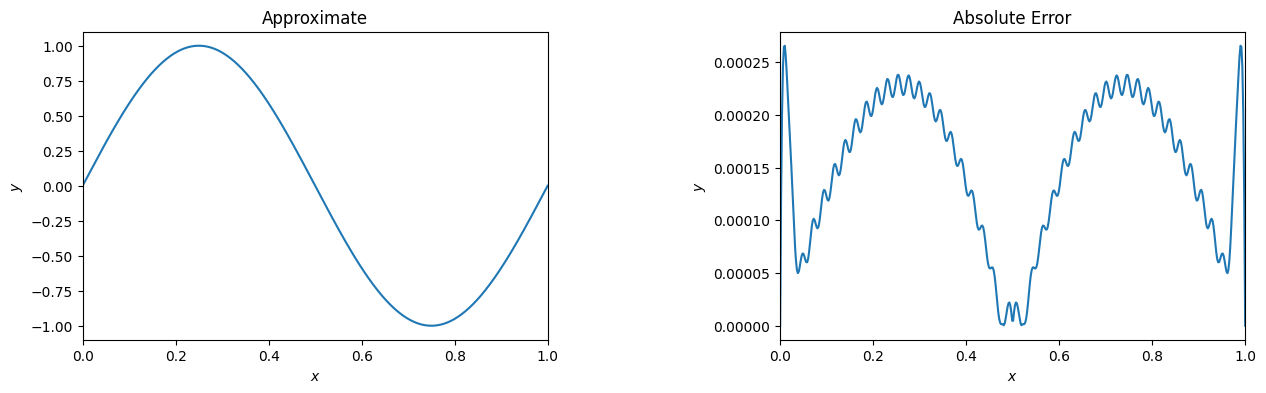

In [3]:
rad.plot.spread(
    ranges,
    # exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x)),
    n=500,
    wspace=0.5,
    hspace=0.5,
    # titles=["Exact", "Approximate", "Abs. Error"],
    titles=["Approximate", "Absolute Error"],
    figsize=(15, 4),
    filename="figures/kansa-helmholtz.pdf",
)

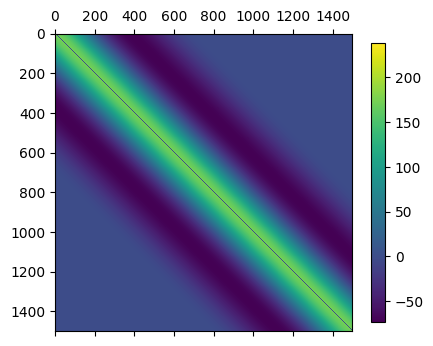

In [4]:
import  matplotlib.pyplot as plt


plt.matshow(solver.mat)
plt.colorbar(shrink=0.75)
plt.show()